## 1. Fetching Financial Data

In [16]:
import yfinance as yf
import numpy as np

# Fetching stock data for Apple Inc. from Jan 1, 2020, to Jan 1, 2021.
data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')

# Extracting the Adjusted Close Prices
prices = data['Adj Close']

# Calculating daily returns as percentage change in prices
returns = prices.pct_change().dropna()  # Remove NaN values that arise from pct_change()

[*********************100%%**********************]  1 of 1 completed


Date
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
                ...   
2020-12-24    0.007712
2020-12-28    0.035766
2020-12-29   -0.013315
2020-12-30   -0.008527
2020-12-31   -0.007702
Name: Adj Close, Length: 252, dtype: float64

## 2. Defining the Likelihood Function


In [18]:
def log_likelihood(theta, data):
    # theta contains our parameters. In this case, mu (mean) and sigma (standard deviation)
    mu, sigma = theta

    # The number of data points
    n = len(data)

    # The log-likelihood of the data under a normal distribution assumption
    return -0.5 * np.sum(((data - mu) / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))

## 3. Setting Up and Running MCMC with "emcee"


In [19]:
import emcee

# Initial estimates for mu and sigma based on data
mu_init = np.mean(returns)
sigma_init = np.std(returns)

# Number of walkers - should be more than twice the number of parameters
nwalkers = 50

# Number of steps each walker will take
nsteps = 1000

# Initial positions of the walkers (slightly perturbed from the initial estimates)
pos = [np.array([mu_init, sigma_init]) + 1e-4*np.random.randn(2) for i in range(nwalkers)]

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, 2, log_likelihood, args=[returns])

# Run the MCMC for a specified number of steps
sampler.run_mcmc(pos, nsteps, progress=True)

100%|██████████| 1000/1000 [00:18<00:00, 54.23it/s]


State([[ 2.87489330e-03  2.94415243e-02]
 [ 2.12860521e-03  2.98801179e-02]
 [ 2.33099266e-03  2.92328021e-02]
 [ 2.63129095e-03  2.90884007e-02]
 [-4.53612159e-04  3.11860194e-02]
 [ 1.10270716e-03  2.97525217e-02]
 [ 2.85894121e-04  2.83331918e-02]
 [ 2.09405227e-03  2.88222607e-02]
 [ 1.07119529e-03  2.82347253e-02]
 [ 4.54971435e-04  2.80233446e-02]
 [ 3.79098940e-03  2.84996714e-02]
 [ 1.57682862e-03  2.72641942e-02]
 [ 6.32233029e-03  2.92400131e-02]
 [ 2.37811750e-03  2.79103259e-02]
 [ 2.32945803e-03  3.12339863e-02]
 [ 5.70886558e-03  3.11715768e-02]
 [ 2.09703444e-03  2.99259267e-02]
 [ 3.11894144e-03  2.88749795e-02]
 [ 4.34085823e-04  3.01069625e-02]
 [ 1.16030041e-03  3.16847127e-02]
 [-7.10340150e-05  2.91733430e-02]
 [ 3.98676496e-03  3.37599358e-02]
 [ 2.37349415e-03  3.14101868e-02]
 [ 1.49330137e-04  2.80797432e-02]
 [ 4.71140280e-03  2.87361652e-02]
 [ 3.76158375e-03  2.77792967e-02]
 [ 2.97979249e-03  2.83879929e-02]
 [ 2.90792311e-03  2.85513975e-02]
 [ 2.77041362e

**Mathematical Background:** *emcee* uses an affine-invariant ensemble sampler. It involves multiple "walkers" that explore the parameter space. Each walker moves around in the parameter space, and their positions over time give us an approximation of the posterior distribution.

## 4. Analyzing the Results


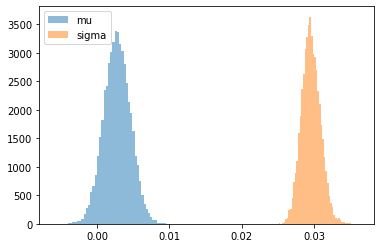

In [20]:
import matplotlib.pyplot as plt

# Extracting the samples
samples = sampler.get_chain(flat=True)

# Plotting histograms of the parameter distributions
plt.hist(samples[:, 0], bins=50, alpha=0.5, label="mu")
plt.hist(samples[:, 1], bins=50, alpha=0.5, label="sigma")
plt.legend()
plt.show()


**Mathematical Background:** After running the MCMC simulation, we get a distribution of values for $\mu$ and $\sigma$. These distributions are approximations of the posterior distributions of the parameters given the data. The histograms of these samples give us insight into the likely values of $\mu$ and $\sigma$, including their uncertainty.